In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
birth_data = pd.read_csv('./birth_life_2010.txt', sep='\t')

In [4]:
birth_data.dtypes
birth_data.count()
birth_data.head()
tf.reset_default_graph()

Country             object
Birth rate         float64
Life expectancy    float64
dtype: object

Country            190
Birth rate         190
Life expectancy    190
dtype: int64

,Country,Birth rate,Life expectancy
0,Vietnam,1.822,74.828244
1,Vanuatu,3.869,70.819488
2,Tonga,3.911,72.150659
3,Timor-Leste,5.578,61.999854
4,Thailand,1.579,73.927659


In [5]:
# Creating placeholders
x, y = tf.placeholder(dtype=np.float64, name="birth_r"), tf.placeholder(dtype=np.float64,name="life_e")

In [6]:
# Creating weight and bias
w, b = tf.get_variable(initializer=tf.constant(0, dtype=np.float64), name='weight'), tf.get_variable(initializer=tf.constant(0, dtype=np.float64), name='bias')

In [7]:
y_predicted = (w * x) + b

In [8]:
loss = tf.square(y - y_predicted, name='loss')

In [9]:
def huber_loss(labels, predictions, delta=np.float64(14.0)):
    residual = tf.abs(labels - predictions)
    def f1(): return np.float64(0.5) * tf.square(residual)
    def f2(): return delta * residual - np.float64(0.5) * tf.square(delta)
    return tf.cond(residual < delta, f1, f2)

In [10]:
h_loss = huber_loss(y, y_predicted)

In [11]:
opt = tf.train.GradientDescentOptimizer(learning_rate=0.001)
optimizer = opt.minimize(loss)
optimizer_huber = opt.minimize(h_loss)

In [12]:
writer = tf.summary.FileWriter('./tensorboard' + '/lin_reg', tf.get_default_graph())

Epoch 0:712.535005237587
Epoch 1:480.17676745085214
Epoch 2:411.2783237319824
Epoch 3:381.1437006393165
Epoch 4:363.96513105775836
Epoch 5:352.0026897210582
Epoch 6:342.6589142409693
Epoch 7:334.84087751432867
Epoch 8:327.95165012670867
Epoch 9:321.6345623793285
Epoch 10:315.69396215732445
Epoch 11:310.0037171133151
Epoch 12:304.46417818447446
Epoch 13:299.02817979825744
Epoch 14:293.669062832272
Epoch 15:288.3635381322181
Epoch 16:283.09297746640374
Epoch 17:277.85605220319576
Epoch 18:272.6434969243245
Epoch 19:267.4463027846113
Epoch 20:262.2599240139595
Epoch 21:257.08643654871054
Epoch 22:251.93354336655545
Epoch 23:246.79729668423587
Epoch 24:241.6799176966745
Epoch 25:236.58196062613882
Epoch 26:231.50320557146858
Epoch 27:226.44629723773215
Epoch 28:221.4129237812956
Epoch 29:216.40054086517657
Epoch 30:211.41798175320912
Epoch 31:206.46303673549016
Epoch 32:201.52502939993994
Epoch 33:196.6060671764693
Epoch 34:191.6989427419048
Epoch 35:186.81899044067575
Epoch 36:181.9695329

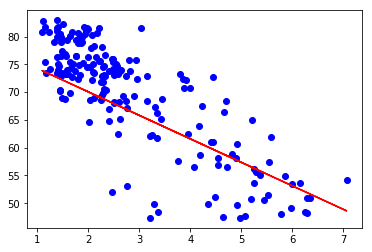

In [13]:
with tf.Session() as sess:
    sess.run(tf.variables_initializer([w,b]))
    
    for i in range(100):
        total_loss = 0
        for X, Y in zip(birth_data['Birth rate'], birth_data['Life expectancy']):
            l, _, _ = sess.run([h_loss, optimizer_huber, y_predicted], feed_dict={x:X, y:Y})
            total_loss += l
        
        print("Epoch {0}:{1}".format(i, total_loss/birth_data.shape[0]))
    writer.close()
    print("w={0}, b={1}".format(w.eval(), b.eval()))
    plt.plot(birth_data['Birth rate'], birth_data['Life expectancy'], 'bo')
    plt.plot(birth_data['Birth rate'], birth_data['Birth rate'] * w.eval() + b.eval(), 'r')

Epoch 0:1661.8638730976656
Epoch 1:956.3225690576431
Epoch 2:844.6738394498406
Epoch 3:750.7314060156839
Epoch 4:667.6598282113505
Epoch 5:594.1417219832335
Epoch 6:529.0788766474066
Epoch 7:471.5001157634628
Epoch 8:420.5457506072149
Epoch 9:375.4547737484029
Epoch 10:335.5535356719831
Epoch 11:300.2457206550498
Epoch 12:269.00347266092314
Epoch 13:241.3595393258136
Epoch 14:216.90031724895425
Epoch 15:195.2596951936688
Epoch 16:176.11360366675348
Epoch 17:159.17518984306693
Epoch 18:144.190546097416
Epoch 19:130.93492863480995
Epoch 20:119.20940999523225
Epoch 21:108.83791565852711
Epoch 22:99.66460068466995
Epoch 23:91.55152737940328
Epoch 24:84.37660945014741
Epoch 25:78.03179207872884
Epoch 26:72.42144084464823
Epoch 27:67.46091553750685
Epoch 28:63.075307645961594
Epoch 29:59.198322744005104
Epoch 30:55.771291149674845
Epoch 31:52.74229213847483
Epoch 32:50.06537868220367
Epoch 33:47.699891178625435
Epoch 34:45.6098499606781
Epoch 35:43.76341754539487
Epoch 36:42.13242261981514
E

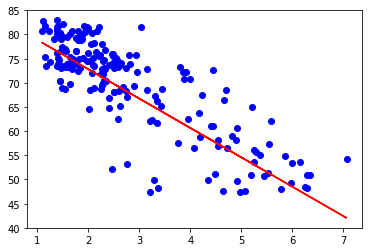

In [14]:
with tf.Session() as sess:
    sess.run(tf.variables_initializer([w,b]))
    
    for i in range(100):
        total_loss = 0
        for X, Y in zip(birth_data['Birth rate'], birth_data['Life expectancy']):
            l, _, _ = sess.run([loss, optimizer, y_predicted], feed_dict={x:X, y:Y})
            total_loss += l
        
        print("Epoch {0}:{1}".format(i, total_loss/birth_data.shape[0]))
    writer.close()
    print("w={0}, b={1}".format(w.eval(), b.eval()))
    plt.plot(birth_data['Birth rate'], birth_data['Life expectancy'], 'bo')
    plt.plot(birth_data['Birth rate'], birth_data['Birth rate'] * w.eval() + b.eval(), 'r')

In [15]:
#Huber loss reduces the final loss, but is the graph really better or more indicative this way? I say no.

In [16]:
#Using tf.data

In [17]:
dataset = tf.data.Dataset.from_tensor_slices((birth_data['Birth rate'], birth_data['Life expectancy']))

In [20]:
print(dataset.output_shapes)
print(dataset.output_types)

(TensorShape([]), TensorShape([]))
(tf.float64, tf.float64)


In [21]:
iterator = dataset.make_one_shot_iterator()
X, Y = iterator.get_next()

In [23]:
with tf.Session() as sess:
    sess.run([X, Y])
    sess.run([X, Y])

[1.8219999999999998, 74.828243902]

[3.8689999999999998, 70.819487805]

In [24]:
# For initializable iterator, just initialize it and skip the feed_dict. It should work.
# iterator = dataset.make_initializable_iterator()
# ...
# for i in range(100): 
#         sess.run(iterator.initializer) 
#         total_loss = 0
#         try:
#             while True:
#                 sess.run([optimizer]) 
#         except tf.errors.OutOfRangeError:
#             pass

In [26]:
mnist_train = pd.read_csv('../../mnist/train.csv')
mnist_test = pd.read_csv('../../mnist/test.csv')

In [31]:
pixel_list = mnist_train.drop(columns='label').columns

In [33]:
mnist_dataset_train = tf.data.Dataset.from_tensor_slices((mnist_train[pixel_list], mnist_train['label']))

In [37]:
iterator = mnist_dataset_train.make_one_shot_iterator()
X, Y = iterator.get_next()

In [ ]:
Y_predicted = tf.nn.softmax(X * w + b)

In [38]:
with tf.Session() as sess:
    sess.run([X, Y])

[array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 188, 255,  94,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 191, 250, 253,  93,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0